# Análisis de filtro PASA BAJOS con RC

El circuito tiene las siguientes características:

```
 _____ -V0 (SIN)+ _______ R ________ C ____   
|                     |          |         |  
GND                  Vin         VC        GND
```

Parámetros:
- R = 80 $k \Omega$
- C = 1 $n F$

- Frecuencia de corte $f= \frac{1}{2 \pi R C} \approx 2$ kHz
- $V_0$ sinusoidal, amplitud $5V$. Barrido en frecuencia  $f \approx (10, 10)$ kHz
- En $V_{in}$ se mide la amplitud de la señal de entrada (CRMS) respecto de GND (masa) (Res. int. gen. $r_G=50 \Omega$).
- En $V_C$ se mide la amplitud de la señal de entrada (CRMS) en el capacitor respecto de GND (masa).

Empezamos importando las librerías necesarias:

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Cargamos los datos,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f       100 non-null    float64
 1   T       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None


<Axes: xlabel='f', ylabel='T'>

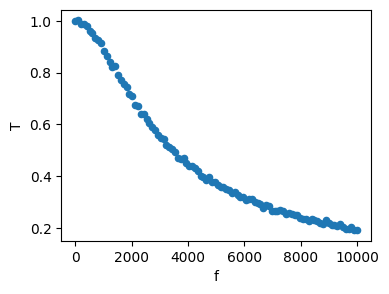

In [45]:
arx = 'datos/RC_PB.csv'
df = pd.read_csv(arx)

print (df.info())

df.plot.scatter(x='f',y='T', figsize=(4,3))

Cambiamos la unidad del eje x para optimizar el ajuste,

In [46]:
U = 1e4
f = df["f"].to_numpy()/U
T = df["T"].to_numpy()


La frecuencia de corte teórica nos sirve como referencia para fijar la semilla,

In [47]:
R= 80e3 + 50
C= 1e-9

fc_th = ( 1.0/(2*np.pi*R*C) )/U 

print( f"Frec corte teórica: {fc_th:.6f} [UHz]")


Frec corte teórica: 0.198819 [UHz]


Defino el modelo para la función de transferencia como,

$$
T = \frac{|V_{out}|}{|V_{in}|} = \frac{ 1 }{ \sqrt{1 + (\frac{f}{f_c})^2} }.
$$

Hago el ajuste,

In [48]:
def modelo_T( f, fc ):
    x = 1.0*f/fc
    T = 1.0/np.sqrt( 1.0 + x**2 )
    return T


# Semilla frec corte
fc_ini = 0.1

popt, pcov = curve_fit(modelo_T, f, T, p0=fc_ini )      

fc_exp = popt[0]

# Errores estandar
SE_fc = np.sqrt(np.diag(pcov))[0]

print ("Parámetros obtenidos del ajuste:")
print(f"fc = ({fc_exp:.6f} ± {SE_fc:.6f}) [UHz]")

Parámetros obtenidos del ajuste:
fc = (0.199183 ± 0.000393) [UHz]


Gráfico de lo obtenido,

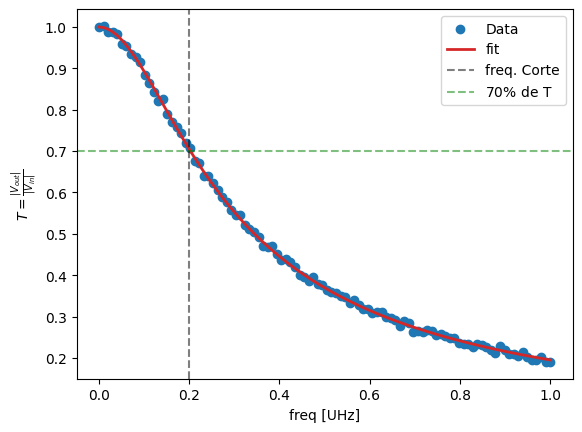

In [49]:
fig,ax = plt.subplots()

ax.scatter( f,T, label='Data' )

ax.plot(f, modelo_T(f,fc_exp), c= 'C3', label='fit', linewidth=2)

ax.axvline( fc_exp, linestyle='--', c='black', alpha=0.5, label='freq. Corte' )

ax.axhline( 0.7, linestyle='--', c='green', alpha=0.5, label=r'$70\%$ de T' )

ax.set_xlabel("freq [UHz]")
ax.set_ylabel(r"$T = \frac{|V_{out}|}{|V_{in}|}$")
ax.legend()
plt.show()


Vemos que la frecuencia de corte se corresponde con el valor donde la amplitud de salida es el $70 \%$ de la amplitud de entrada.

### Gráfico de la atenuación

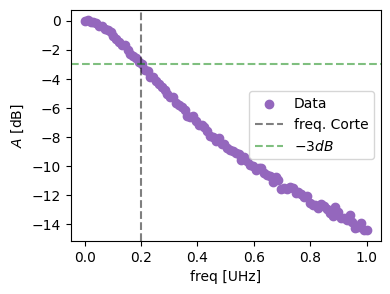

In [50]:
A = 20*np.log10(T)


fig,ax = plt.subplots(figsize=(4,3))

ax.scatter( f,A, label='Data', c='C4' )

ax.axvline( fc_exp, linestyle='--', c='black', alpha=0.5, label='freq. Corte' )

ax.axhline( -3, linestyle='--', c='green', alpha=0.5, label=r'$-3dB$' )


ax.set_xlabel("freq [UHz]")
ax.set_ylabel(r"$A$ [dB]")
ax.legend()
plt.show()